## SVM Classification:

### Import required packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature #for LBP feature extraction
from sklearn import svm #for svm classification
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns #for better visualization of data (e.g confusion matrix)

### Load MNIST Dataset and split it into train and test

In [3]:
#Helper function to load Dataset, unzip it and return images and labels 
#Reference: https://github.com/zalandoresearch/fashion-mnist

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
#Use the function to load the dataset and split it into train and test

X_train, y_train = load_mnist("C:\\Users\\Evgenia\\Desktop\\DeepLearning", kind='train')
X_test, y_test = load_mnist("C:\\Users\\Evgenia\\Desktop\\DeepLearning", kind='t10k')

In [5]:
# initialize the label names from MNIST dataset

labelNames = ["0", "1", "2", "3", "4","5","6","7","8","9"]

In [6]:
print(np.shape(X_train))
print(np.shape(X_test))

# The 28X28 images are flattened to feature vector of size 784
# There are 60,000 training examples in the training dataset
# There are 10,000 test sample in the testing dataset

(60000, 784)
(10000, 784)


#### Reshaping the feature vector back into the 28X28 image

In [7]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


#### Visualization of Dataset

2
1
3
6


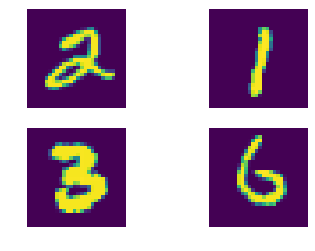

In [8]:
# view few images and print its corresponding label
img_index = 5
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1200
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 28760
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 33560
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])


### Extraction of HOG features from MNIST dataset and classification using SVM multiclass classification.

In [9]:
# initialize the data matrix and labels
print("Extracting features from training dataset...")
data_train_hog = []
labels_train_hog = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features
  image = (X_train[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
 
  # update the data and labels
  data_train_hog.append(H)
  labels_train_hog.append(y_train[img_index])

print(np.shape(data_train_hog))
print(np.shape(labels_train_hog))

Extracting features from training dataset...
(60000, 36)
(60000,)


In [ ]:
model = svm.SVC(kernel='rbf',C=1000.0, random_state=42) # rbf Kernel
model.fit(data_train_hog, labels_train_hog)

C:\Users\Evgenia\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
print("Train set Accuracy: {:.2f}".format(model.score(data_train_hog,labels_train_hog)))

In [33]:
#Evaluation of the model on test dataset
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)
  
  labels_test.append(y_test[img_ind])
  
print(np.shape(predict_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000,)
(10000,)


In [34]:
# Test set Accuracy
accuracy = metrics.accuracy_score(y_test, predict_test)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.9063


[[ 921    5    7    0    2    4   15    0   16   10]
 [   7 1114    2    3    4    0    3    1    0    1]
 [   8    2  920   36    7    4    2   36   15    2]
 [   2    0   36  889    0   26    0   18   28   11]
 [   5    4   10    0  883    1   63    2    5    9]
 [   2    3    8   31    2  802    6    2   28    8]
 [  16    1    0    0   30    9  893    0    5    4]
 [   2    6   46   32    0    3    0  928    3    8]
 [  32    1   14   28    7   20   23    3  805   41]
 [  11    5    6   12    4   15    2    9   37  908]]


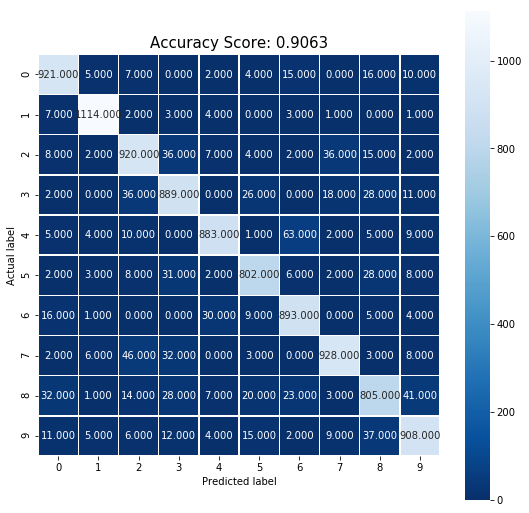

In [37]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predict_test)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [38]:
images = []
orig_labels=[]
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the clothing
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H1.reshape(1, -1))[0]
  #prediction = model.predict(test_img.reshape(1, -1))
  label = labelNames[pred]
  orig_labels.append(labelNames[y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

4
2
0
9


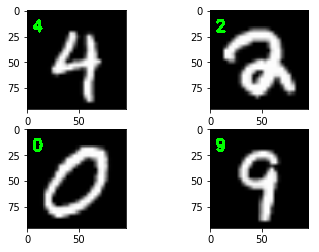

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])

### Extraction of LBP features from MNIST dataset and classification using SVM multiclass classification.

#### Local Binary Patterns (LBP) class definition for LBP feature extraction

In [41]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		# return the histogram of Local Binary Patterns
		return hist

**LBP feature extraction for the whole training dataset**

In [43]:
# Create an object of LocalBinaryPatterns class and initial the parameters.
desc = LocalBinaryPatterns(24, 8)
data_train_lbp = []
labels_train_lbp = []

# loop over the training images
for img_index in range(len(X_train)):
	# load the image, convert it to grayscale, and extract LBP features
	image = (X_train[img_index])
	hist = desc.LBPfeatures(image)
 
	# extract the label from the image path, then update the
	# label and data lists
	labels_train_lbp.append(y_train[img_index])
	data_train_lbp.append(hist)

#### Train SVM Classifier using the training dataset

****Note: Takes long time ...****

In [44]:
# train a SVM clasifier on the training data
# Initialize the SVM model
model = svm.SVC(kernel='rbf',C=1000.0, random_state=42,gamma='auto') # rbf Kernel
# Start training the SVM classifier 
model.fit(data_train_lbp, labels_train_lbp)

print(np.shape(data_train_lbp))
print(np.shape(labels_train_lbp))

(60000, 26)
(60000,)


In [46]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(model.score(data_train_lbp,labels_train_lbp)))

# Expected training set Accuracy 0.60

Train set Accuracy: 0.49


#### Evaluation of trained SVM model on test dataset

In [47]:
predictions=[]
predict_label=[]
# Exract LBP features for each test sample and classify it with the trained SVM classifier
for im_index in range(len(X_test)):
  imag = X_test[im_index]
  # Extract LBP feature
  histo = desc.LBPfeatures(imag)
  # Perform classification
  prediction = model.predict(histo.reshape(1, -1))
  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(y_test[im_index])

In [48]:
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.4983


[[ 904    0   11    5    3   34    0    1    3   19]
 [   0 1089    8    0    2    0    1   33    2    0]
 [  25    1  507   73   39   79   32  147  106   23]
 [  51   19  155  218   94  119   35  144  118   57]
 [   7    3  116   17  314   25   29   80   66  325]
 [ 114   11  111   68   58  208   23  164   38   97]
 [  65   19  193   62   62   80  103  121  141  112]
 [  12   62   76   13   58   58   15  671   21   42]
 [  45    5   73   90   57   26   55   37  491   95]
 [  58   16   23   40  179   46   57   62   50  478]]


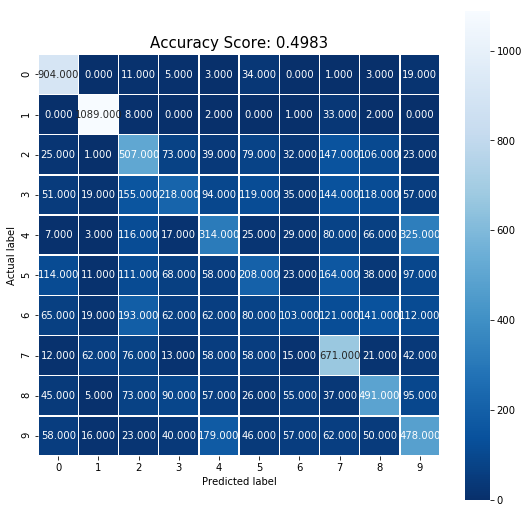

In [49]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [50]:
# Display the some classification result on test samples
images = []
 
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the clothing
  histog = desc.LBPfeatures(X_test[i])
  prediction = model.predict(histog.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

In [51]:
np.shape(images[1])

(96, 96, 3)

0


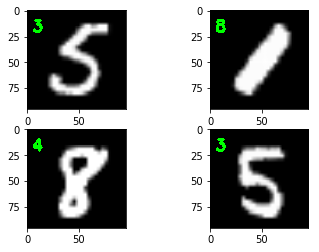

In [21]:
## Display the classification results
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])